In [13]:
### 🔧 TAREA
# Compara el desempeño de la red neuronal con la regresión logística. Analiza sus métricas, curva ROC y precisión vs. recall.

In [14]:
import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [15]:
# 🔧 Cargar configuración
config = train.load_config("../config.yaml")

In [16]:
# 📦 Cargar y preparar los datos
X, y = train.load_data("../data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [17]:
# 🧪 Entrenar modelo base (Regresión Logística)
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

# 🔍 Predicciones del modelo base
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

In [18]:
# 📥 Cargar modelo entrenado Red Neuronal
from tensorflow.keras.models import load_model
nn_model = load_model("../models/nn_model.keras")

# 🔍 Predicciones de Red Neuronal
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn, threshold=0.4)

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step


In [19]:
# 📊 Evaluación individual
ev.evaluate_model(y_test, y_pred_log, y_proba_log, model_name="Regresión Logística")
ev.evaluate_model(y_test, y_pred_nn, y_proba_nn, model_name="Red Neuronal")


📊 Evaluación del modelo: Regresión Logística
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4000
           1       0.76      0.65      0.70      4004

    accuracy                           0.72      8004
   macro avg       0.73      0.72      0.72      8004
weighted avg       0.73      0.72      0.72      8004

F1 Score     : 0.7009
Precision    : 0.7586
Recall       : 0.6513
ROC AUC      : 0.7968

📊 Evaluación del modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4000
           1       0.75      0.76      0.76      4004

    accuracy                           0.75      8004
   macro avg       0.75      0.75      0.75      8004
weighted avg       0.75      0.75      0.75      8004

F1 Score     : 0.7551
Precision    : 0.7472
Recall       : 0.7632
ROC AUC      : 0.8310


{'f1': 0.7551272547566098,
 'precision': 0.7471882640586797,
 'recall': 0.7632367632367633,
 'roc_auc': 0.8309521728271729}

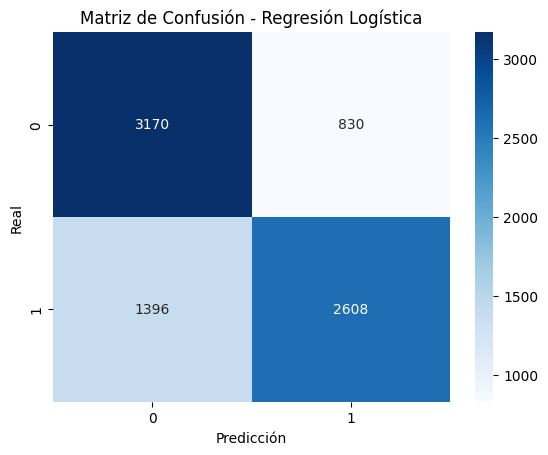

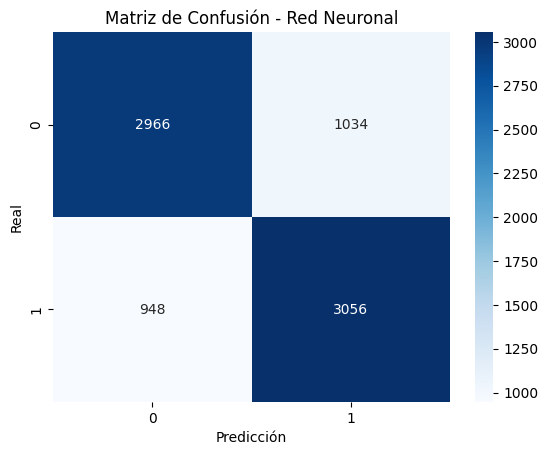

In [20]:
# 🧱 Matrices de Confusión
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

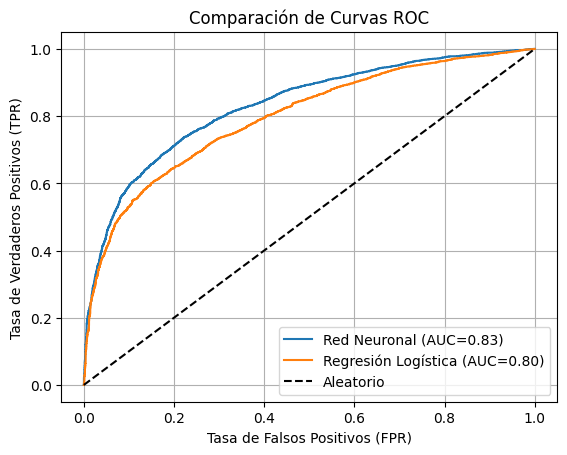

In [21]:
# 📈 Comparación de curvas ROC
ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log,
                       label1="Red Neuronal", label2="Regresión Logística")

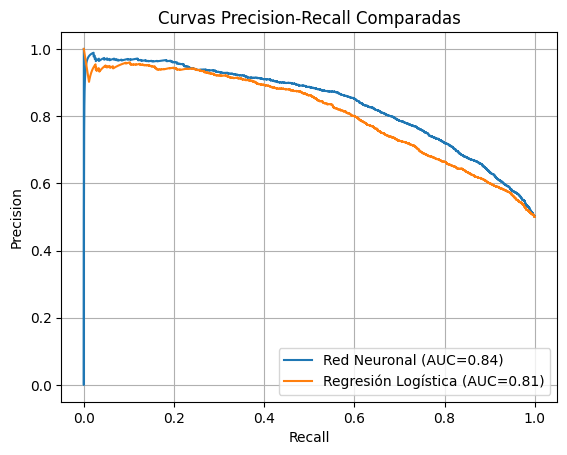

In [22]:
# 🔍 Comparación de curvas Precision-Recall
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log,
                                 label1="Red Neuronal", label2="Regresión Logística")

In [23]:
# 📋 Comparación de métricas en tabla
df_metrics = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal",
    model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(df_metrics)

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.747188,0.763237,0.755127,0.830952
1,Regresión Logística,0.758581,0.651349,0.700887,0.796762


# Métricas cambiando el umbral a 0.40

En el notebook "Evaluacion.ipynb" se trabajó con el umbral de 0.5, logrando las siguientes métricas:

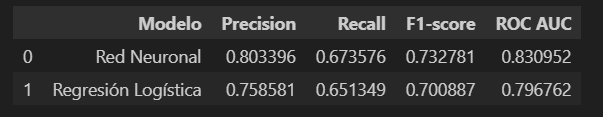


En ests notebook se trabajó con un umbral de 0.40 logrando las siguientes métricas:

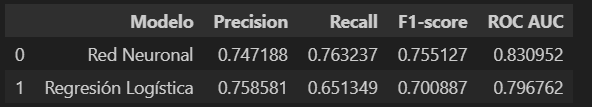


Este ajuste logró una mejora sustancial del Recall y el F1 score, manteniendo el ROC AUC pero sacrificando un poco la precisión. Pero en este contexto sería menos doloroso para el banco.